# Example of context

In [ ]:
import numpy as np
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import multihist as mh

import GOFevaluation

import appletree as apt
from appletree.utils import get_file_path

In [ ]:
apt.set_gpu_memory_usage(0.2)

## Define context

In [ ]:
# Pattern 1. 
# Load configuration file
config = get_file_path("rn220.json")

# Initialize context
tree = apt.Context(config)

In [ ]:
# Pattern 2.
tree = apt.contexts.ContextRn220Extend()

In [4]:
er = tree.likelihoods['rn220_llh'].components['rn220_er']

In [11]:
print(er.code)

from functools import partial
from jax import jit
from appletree.plugins import PositionSpectra
from appletree.plugins import UniformEnergySpectra
from appletree.plugins import RecombFluct
from appletree.plugins import mTI
from appletree.plugins import Quanta
from appletree.plugins import TrueRecombER
from appletree.plugins import IonizationER
from appletree.plugins import DriftLoss
from appletree.plugins import RecombinationER
from appletree.plugins import S2LCE
from appletree.plugins import ElectronDrifted
from appletree.plugins import S2PE
from appletree.plugins import S1LCE
from appletree.plugins import PhotonDetection
from appletree.plugins import S1PE
from appletree.plugins import S2
from appletree.plugins import S1
from appletree.plugins import S1NHits
from appletree.plugins import PositionRecon
from appletree.plugins import AntiCorrelationEfficiency
from appletree.plugins import FiducialVolumeCylinderAccept
from appletree.plugins import S2CutAccept
from appletree.plugins import

In [12]:
from appletree.share import _cached_configs, _cached_functions
_cached_configs['upper_energy'] = 20.0

In [13]:
_cached_configs

{
    "anti_correlation_eff": "/home/ykaminaga/appletree/applefiles/files/rn220_ambience/anti_correlation_eff_rn220_sr1.json",
    "elife": "/home/ykaminaga/appletree/applefiles/files/electron_lifetime/elife_bkg_sr1.json",
    "gas_gain_relative": "/home/ykaminaga/.local/lib/python3.11/site-packages/appletree/maps/_gas_gain_relative.json",
    "lower_energy": 1e-05,
    "posrec_reso": "/home/ykaminaga/appletree/applefiles/files/posrec/posrec_reso_sr0.json",
    "r_max": 60.0,
    "s1_bias_3f": "/home/ykaminaga/appletree/applefiles/files/s1_bias/3fold_s1_bias_rn220_sr1.json",
    "s1_correction": "/home/ykaminaga/appletree/applefiles/files/s1_xyz/s1_correction_sr1.json",
    "s1_cut_acc": [
        "s1_cut_acc_median_rn220_sr1.json",
        "s1_cut_acc_lower_rn220_sr1.json",
        "s1_cut_acc_upper_rn220_sr1.json"
    ],
    "s1_cut_acc_lower": {
        "rn220_llh": "s1_cut_acc_lower_rn220_sr1.json"
    },
    "s1_cut_acc_median": {
        "rn220_llh": "s1_cut_acc_median_rn220_sr1.

In [7]:
_cached_configs

{
    "anti_correlation_eff": "/home/ykaminaga/appletree/applefiles/files/rn220_ambience/anti_correlation_eff_rn220_sr1.json",
    "elife": "/home/ykaminaga/appletree/applefiles/files/electron_lifetime/elife_bkg_sr1.json",
    "gas_gain_relative": "/home/ykaminaga/.local/lib/python3.11/site-packages/appletree/maps/_gas_gain_relative.json",
    "lower_energy": 0.01,
    "posrec_reso": "/home/ykaminaga/appletree/applefiles/files/posrec/posrec_reso_sr0.json",
    "r_max": 60.0,
    "s1_bias_3f": "/home/ykaminaga/appletree/applefiles/files/s1_bias/3fold_s1_bias_rn220_sr1.json",
    "s1_correction": "/home/ykaminaga/appletree/applefiles/files/s1_xyz/s1_correction_sr1.json",
    "s1_cut_acc": [
        "s1_cut_acc_median_rn220_sr1.json",
        "s1_cut_acc_lower_rn220_sr1.json",
        "s1_cut_acc_upper_rn220_sr1.json"
    ],
    "s1_cut_acc_lower": {
        "rn220_llh": "s1_cut_acc_lower_rn220_sr1.json"
    },
    "s1_cut_acc_median": {
        "rn220_llh": "s1_cut_acc_median_rn220_sr1.j

In [8]:
# To see all the likelihoods

tree.print_context_summary(short=True)


LIKELIHOOD rn220_llh

----------------------------------------
BINNING

    bins_type: equiprob
    bins_on: ['cs1', 'cs2']

----------------------------------------
DATA

    file_name: /stor0/kaminaga/data/yue_rn220_global_v15_wimp_20241025.csv
    data_rate: 13285.0

----------------------------------------
MODEL

    COMPONENT 0: rn220_er
        type: simulation
        rate_par: rn220_er_rate
        pars: {'p_dpe', 'rn220_er_rate', 'py4', 'nex_ni_ratio', 'g1', 's1_cut_acc_sigma', 'rf0', 'g2', 'py3', 'py0', 'fano', 'py2', 'drift_velocity', 'rf1', 'py1', 'w', 's2_cut_acc_sigma', 'elife_sigma', 'hits_acceptance', 's2_threshold', 'field', 's1_eff_n_hits_3f_sigma', 'gas_gain'}

    COMPONENT 1: rn220_ac
        type: fixed
        file_name: ac_template_rn220_sr1.csv
        rate_par: rn220_ac_rate
        pars: {'rn220_ac_rate'}

----------------------------------------



## Fit, run the MCMC

In [5]:
result = tree.fitting(nwalkers=100, iteration=10)

With no backend


  0%|                                                                                            | 0/10 [00:00<?, ?it/s]/home/ykaminaga/.local/lib/python3.11/site-packages/appletree/likelihood.py:349: RuntimeWarning: invalid value encountered in log
  llh = np.sum(self.data_hist * np.log(model_hist) - model_hist)
100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


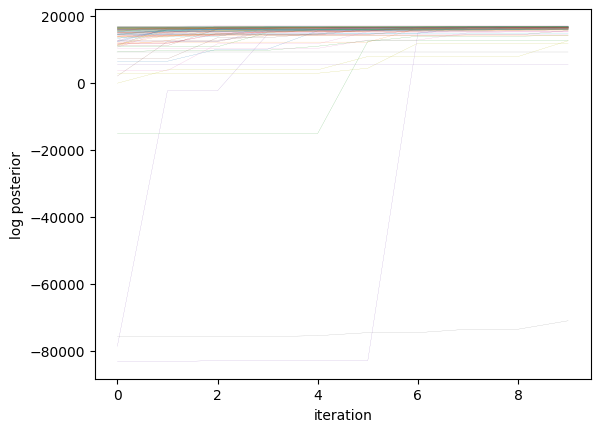

In [6]:
logp = tree.sampler.get_log_prob()

for _logp in logp.T:
    plt.plot(_logp, lw=0.1)

plt.xlabel("iteration")
plt.ylabel("log posterior")
plt.show()

## Generate templates

In [7]:
cs1, cs2, eff = tree.get_template("rn220_llh", "rn220_er")

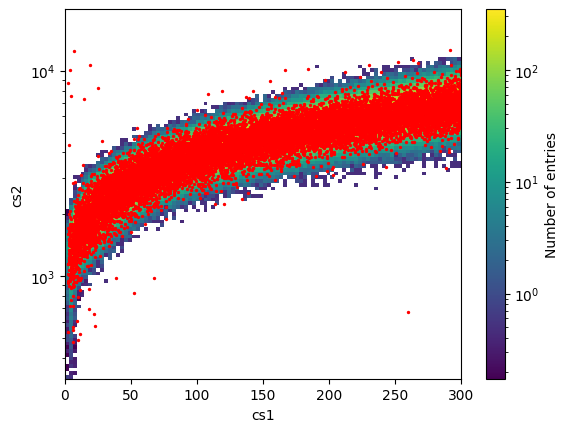

In [10]:
h, be = jnp.histogramdd(
    jnp.asarray([cs1, cs2]).T,
    bins=(jnp.linspace(0, 300, 101), jnp.logspace(2.5, 4.3, 101)),
    weights=eff,
)

h = mh.Histdd.from_histogram(np.array(h), be, axis_names=["cs1", "cs2"])
h.plot(norm=LogNorm())
plt.scatter(*tree["rn220_llh"].data.T, color="r", s=2.0)
plt.yscale("log")
plt.show()

In [49]:
parameters = tree.get_post_parameters()
key = apt.randgen.get_key()
batch_size = int(6e6)

In [13]:
par_manager = tree.par_manager
par_manager.par_config

{'w': {'prior_type': 'norm',
  'prior_args': {'mean': 0.0137, 'std': 0.0002},
  'allowed_range': [0, 1.0],
  'init_mean': 0.013749650633572542,
  'init_std': 0.0002,
  'unit': 'keV',
  'doc': 'Mean energy to generate a quanta in liquid xenon'},
 'fano': {'prior_type': 'fixed',
  'prior_args': {'val': 0.059},
  'allowed_range': None,
  'init_mean': None,
  'init_std': None,
  'unit': '1',
  'doc': 'Fano factor which describes the fluctuation of num of quanta'},
 'gas_gain': {'prior_type': 'fixed',
  'prior_args': {'val': 29.4},
  'allowed_range': None,
  'init_mean': None,
  'init_std': None,
  'unit': 'PE/electron',
  'doc': 'Gas gain'},
 'drift_velocity': {'prior_type': 'fixed',
  'prior_args': {'val': 0.0677},
  'allowed_range': None,
  'init_mean': None,
  'init_std': None,
  'unit': 'cm/us',
  'doc': 'Drift velocity'},
 's2_threshold': {'prior_type': 'fixed',
  'prior_args': {'val': 100.0},
  'allowed_range': None,
  'init_mean': None,
  'init_std': None,
  'unit': 'PE',
  'doc': '

In [14]:
parameters

{'w': np.float64(0.013857114512170698),
 'fano': 0.059,
 'gas_gain': 29.4,
 'drift_velocity': 0.0677,
 's2_threshold': 100.0,
 'field': 23.0,
 'nex_ni_ratio': np.float64(0.17091952580163589),
 'g1': np.float64(0.14065729230089516),
 'g2': np.float64(16.558994400393846),
 'p_dpe': np.float64(0.2344678144259812),
 'elife_sigma': np.float64(-0.011897294692322473),
 's1_eff_n_hits_3f_sigma': np.float64(-0.26705593549050965),
 's1_cut_acc_sigma': np.float64(0.3430656951451114),
 's2_cut_acc_sigma': np.float64(0.2936149033070159),
 'hits_acceptance': np.float64(0.9151922120740001),
 'py0': np.float64(0.2039876080754556),
 'py1': np.float64(62.27887675798373),
 'py2': np.float64(-0.4781658103816665),
 'py3': np.float64(1.6191070682160675),
 'py4': np.float64(0.43117128299407564),
 'rf0': np.float64(0.020921239702082137),
 'rf1': np.float64(0.18203421069574477),
 'rn220_er_rate': np.float64(4868.953453406243),
 'rn220_ac_rate': np.float64(31.943056093608803)}

In [6]:
import json
json_open = open(get_file_path('list_param_er_sr1.json'), 'r')
parameters = json.load(json_open)

In [7]:
key = apt.randgen.get_key()
batch_size = int(2e6)
parameters

{'w': 0.013749650633572542,
 'fano': 0.059,
 'gas_gain': 29.4,
 'drift_velocity': 0.0677,
 's2_threshold': 500.0,
 'field': 23.0,
 'nex_ni_ratio': 0.1791762029617344,
 'g1': 0.13664827730869247,
 'g2': 16.07348916385507,
 'p_dpe': 0.2144348514465236,
 'elife_sigma': 0.002994794556350308,
 's1_eff_3f_sigma': -0.0798362960704247,
 's1_cut_acc_sigma': -0.1533004977461605,
 's2_cut_acc_sigma': -0.6616609043119218,
 'hits_acceptance': 0.9340306519043685,
 'py0': 0.18768567987871748,
 'py1': 60.52594018916396,
 'py2': -0.45914673490914004,
 'py3': 1.3450717192696569,
 'py4': 0.4761225328970582,
 'rf0': 0.028570674440450822,
 'rf1': 0.17483856550868887,
 'rn220_ac_rate': 36.418441224141915,
 'rn220_er_rate': 4713.385585132364}

In [8]:
from appletree.utils import load_json, get_file_path
from GOFevaluation import BinnedPoissonChi2GOF, ADTestTwoSampleGOF

In [9]:
data_sample = tree["rn220_llh"].data
mask = data_sample[:, 0] <= 100
mask &= data_sample[:, 0] >= 0
mask &= data_sample[:, 1] <= 1e4
mask &= data_sample[:, 1] >= 1e2
data_sample = data_sample[mask]

In [10]:
key, (cs1, cs2, eff) = tree["rn220_llh"]["rn220_er"].simulate(key, batch_size, parameters)
mask = cs1 <= 100
mask &= cs1 >= 0
mask &= cs2 <= 1e4
mask &= cs2 >= 1e2
mask &= np.random.rand(len(cs1)) < eff
eff = eff[mask]

TypeError: S1.simulate() missing 1 required positional argument: 'num_s1_pe'

In [9]:
# Add AC
reference_sample = np.vstack([cs1[mask], cs2[mask]]).T

ac_template = get_file_path('ac_template_rn220_sr1.csv')
ac_sample = pd.read_csv(ac_template)
ac_sample = ac_sample[(ac_sample.cs1>0)&(ac_sample.cs1<100)&(ac_sample.cs2>1e2)&(ac_sample.cs2<1e4)]
ac_rate = int(parameters['rn220_ac_rate'] / parameters['rn220_er_rate'] * len(reference_sample))
index = np.random.choice(len(ac_sample), size=ac_rate)
ac_sample = ac_sample[['cs1', 'cs2']].to_numpy()[index]

reference_sample = np.concatenate([reference_sample, ac_sample])
reference_sample_weights = np.concatenate([eff, np.ones(len(ac_sample))])

In [11]:
# Check AC rate
print(parameters['rn220_ac_rate']/parameters['rn220_er_rate'], len(ac_sample)/(len(reference_sample)-len(ac_sample)))

0.007726599185735658 0.0077260218863562284


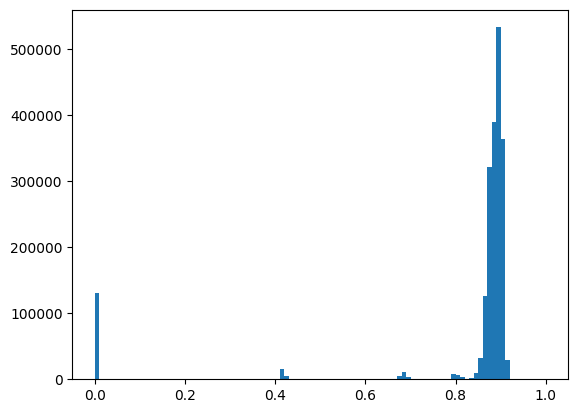

In [9]:
key, (cs1, cs2, eff) = tree["rn220_llh"]["rn220_er"].simulate(key, batch_size, parameters)
plt.hist(eff, bins=100, range=(0,1));

/opt/conda/envs/el7.2025.03.1/lib/python3.11/site-packages/GOFevaluation/utils.py:249: UserWarning: reference_sample contains ties, this might cause problems in the equiprobable binning.
  check_for_ties(reference_sample, dim=dim)


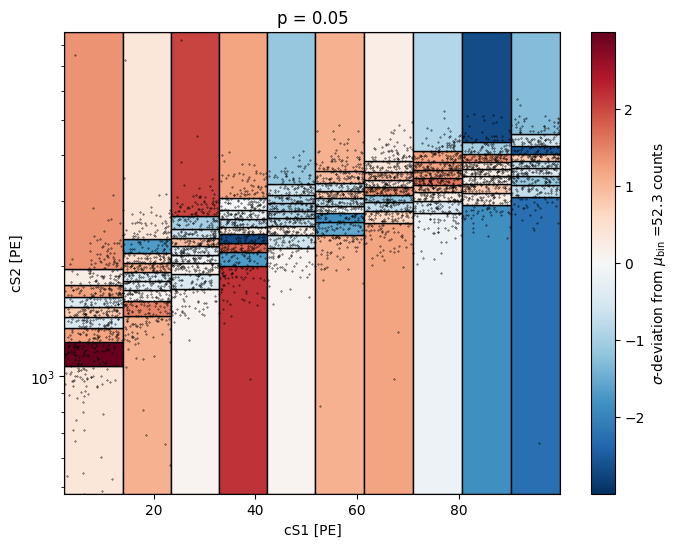

In [11]:
x_clip = tree["rn220_llh"]._config["x_clip"]
y_clip = tree["rn220_llh"]._config["y_clip"]

fig, ax = plt.subplots(1,1, figsize=(8,6))

gof = BinnedPoissonChi2GOF.bin_equiprobable(
    data_sample,
    reference_sample=reference_sample,
    nevents_expected=len(data_sample),
    n_partitions=[10, 9],
    ax=ax,
    plot=True,
    reference_sample_weights=reference_sample_weights,
    #vmin=-3, vmax=+3,
)
plt.scatter(data_sample[:, 0],
            data_sample[:, 1],
            s=0.1, color='k')

plt.title(f"p = {gof.get_pvalue(n_mc=50000):.2f}")
plt.yscale('log')
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2 [PE]')
plt.show()

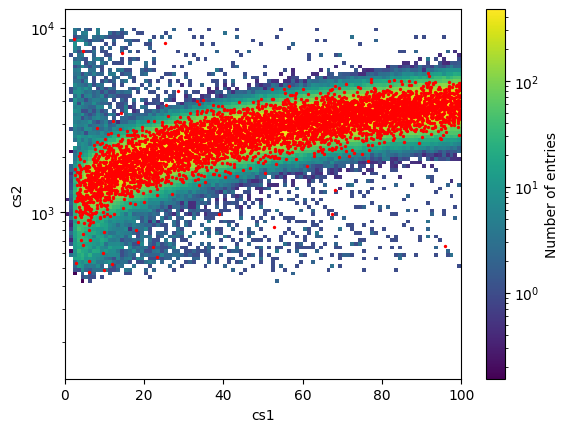

In [15]:
h, be = jnp.histogramdd(
    reference_sample,
    bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.1, 4.1, 101)),
    weights=reference_sample_weights,
)

h = mh.Histdd.from_histogram(np.array(h), be, axis_names=["cs1", "cs2"])
h.plot(norm=LogNorm())
plt.scatter(*tree["rn220_llh"].data.T, color="r", s=2.0)
plt.yscale("log")
plt.show()

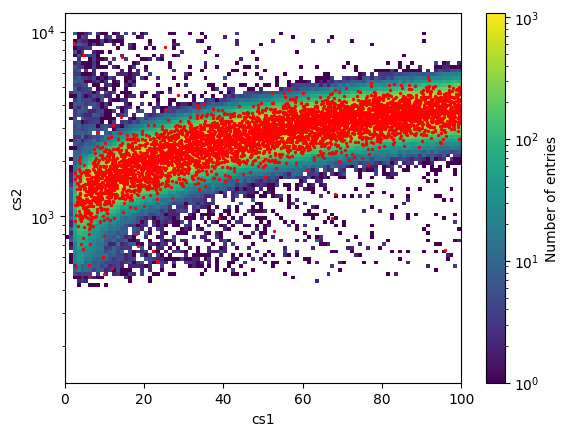

In [14]:
h, be = jnp.histogramdd(
    reference_sample,
    bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.1, 4.1, 101)),
)

h = mh.Histdd.from_histogram(np.array(h), be, axis_names=["cs1", "cs2"])
h.plot(norm=LogNorm())
plt.scatter(*tree["rn220_llh"].data.T, color="r", s=2.0)
plt.yscale("log")
plt.show()

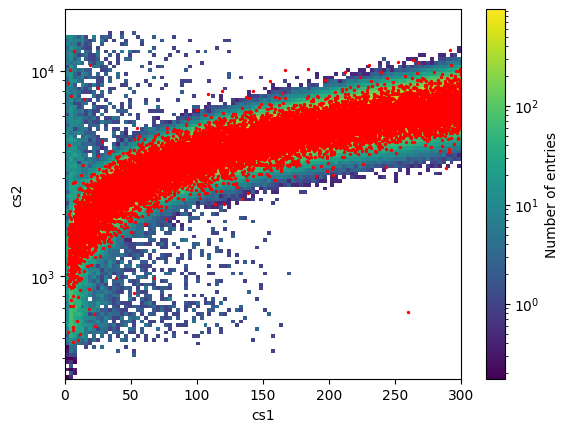

In [55]:
h, be = jnp.histogramdd(
    reference_sample,
    bins=(jnp.linspace(0, 300, 101), jnp.logspace(2.5, 4.3, 101)),
    weights=reference_sample_weights,
)

h = mh.Histdd.from_histogram(np.array(h), be, axis_names=["cs1", "cs2"])
h.plot(norm=LogNorm())
plt.scatter(*tree["rn220_llh"].data.T, color="r", s=2.0)
plt.yscale("log")
plt.show()

## Number of events in equal-probability binning

In [28]:
key, h = tree["rn220_llh"]["rn220_er"].simulate_hist(key, batch_size, parameters)

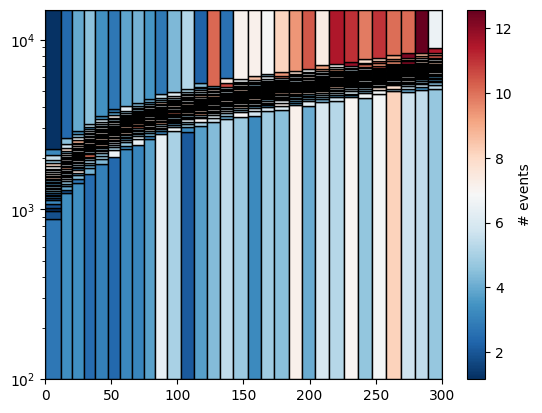

In [29]:
apt.utils.plot_irreg_histogram_2d(*tree["rn220_llh"]["rn220_er"].bins, h, density=False)
plt.yscale("log")

plt.show()

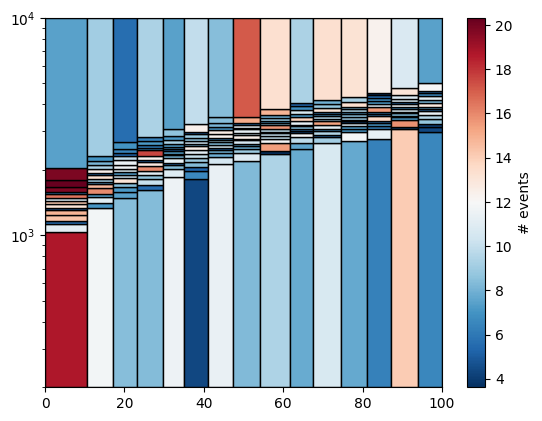

In [13]:
apt.utils.plot_irreg_histogram_2d(*tree["rn220_llh"]["rn220_er"].bins, h, density=False)
plt.yscale("log")

plt.show()